In [135]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics #importing modul metrik
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# Memuat dataset
data = pd.read_csv("E:\Semester 4\data mining/bc.csv",encoding = "ISO-8859-1")

In [136]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [138]:
#menghapus kolom yang tidak berguna
#menghapus kolom "id"
data.drop("id",axis=1,inplace=True)
#menghapus the "Unnamed: 32" column
data.drop("Unnamed: 32",axis=1,inplace=True) 

In [139]:
#hasil
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [140]:
#diagnosis adalah variabel yang bertanggung jawab untuk klasifikasi
#mengganti M dan B masing-masing dengan 1 dan 0
data.diagnosis=data.diagnosis.map({'M':1,'B':0})

In [141]:
#menghitung variabel diagnosis
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [142]:
# preprocessing dataset selesai 
#splitting dataset ke training dan testing
train, test = train_test_split(data, test_size = 0.3,random_state=1234)

In [143]:
#mencari hasil
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [144]:
#membuat variabel independen untuk training
train_X = train.iloc[:, 1:31]
#membuat variabel responsible untuk training
train_y=train.diagnosis
#membuat variabel independen untuk testing
test_X= test.iloc[:, 1:31]
#membuat variabel responsible untuk ttesting
test_y =test.diagnosis

In [145]:
#mencari hasil
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(398, 30)
(398,)
(171, 30)
(171,)


In [146]:
model_entropy= DecisionTreeClassifier(criterion="entropy",random_state=1234)
#learning
model_entropy.fit(train_X,train_y)
#Prediksi
prediction_entropy=model_entropy.predict(test_X)
#mengevaluasi(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_y))


Accuracy: 0.9298245614035088
Confusion Metrix:
 [[99  6]
 [ 6 60]]


In [147]:
feature_cols = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",]
X = data[feature_cols] # mengambil Features
y = data.diagnosis # Target variable


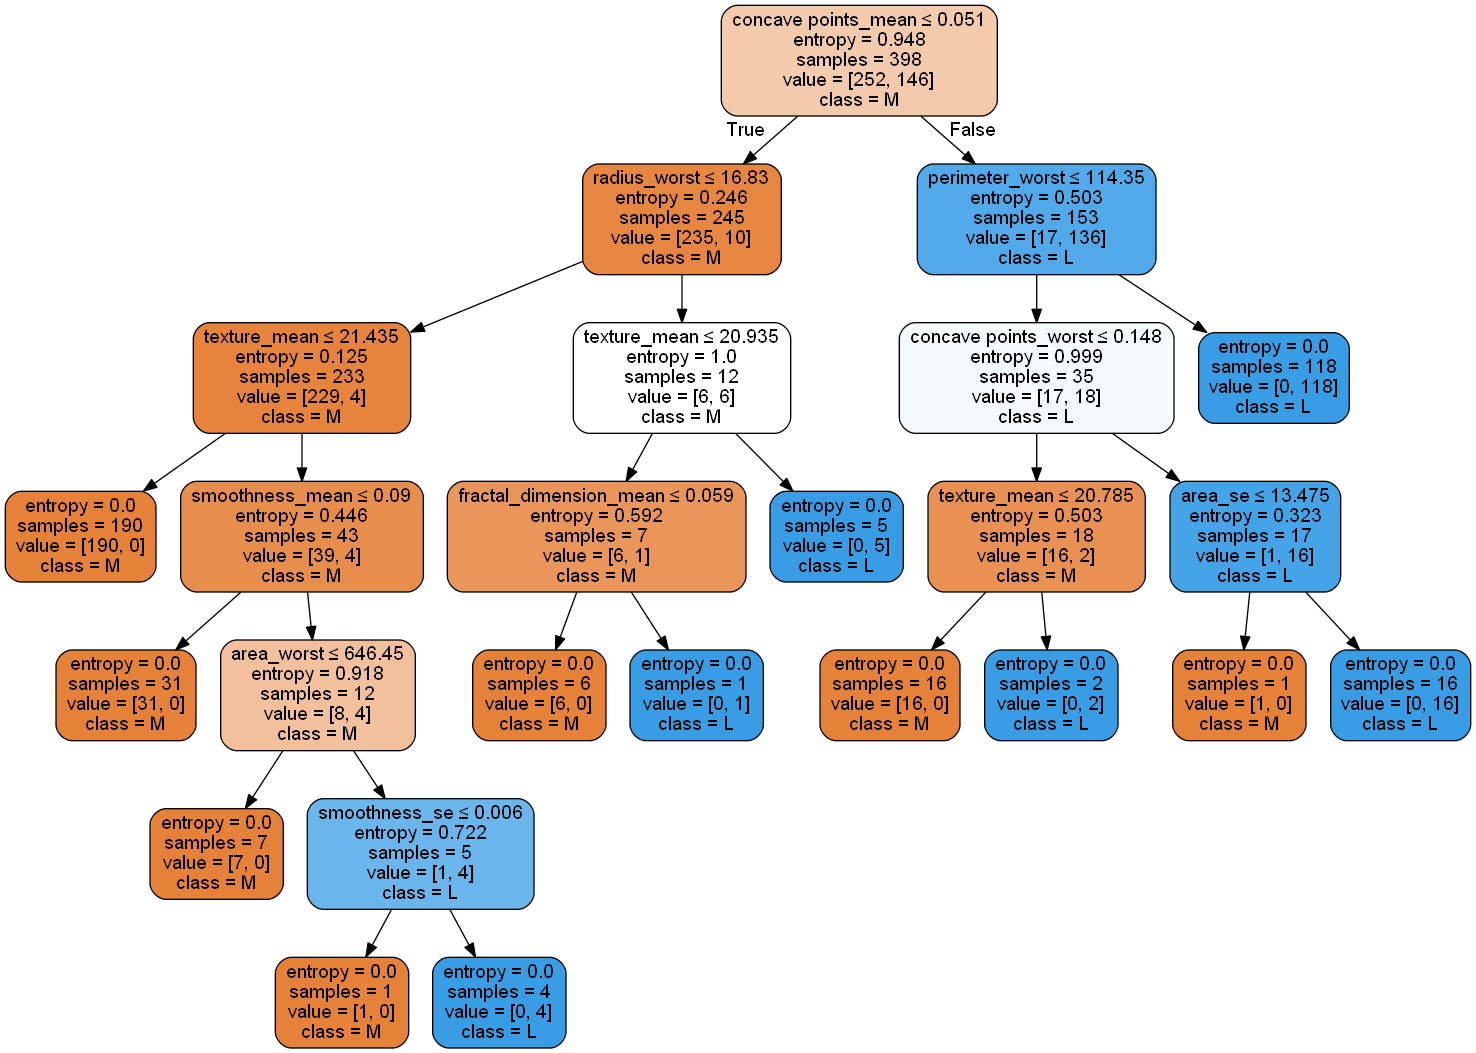

In [148]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['M','L'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy.png')
Image(graph.create_png())

In [149]:
model_gini= DecisionTreeClassifier(criterion="gini",random_state=1234)
#learning
model_gini.fit(train_X,train_y)
#Prediksi
prediction_gini=model_gini.predict(test_X)
#mengevaluasi(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_y))

Accuracy: 0.9298245614035088
Confusion Metrix:
 [[99  6]
 [ 6 60]]


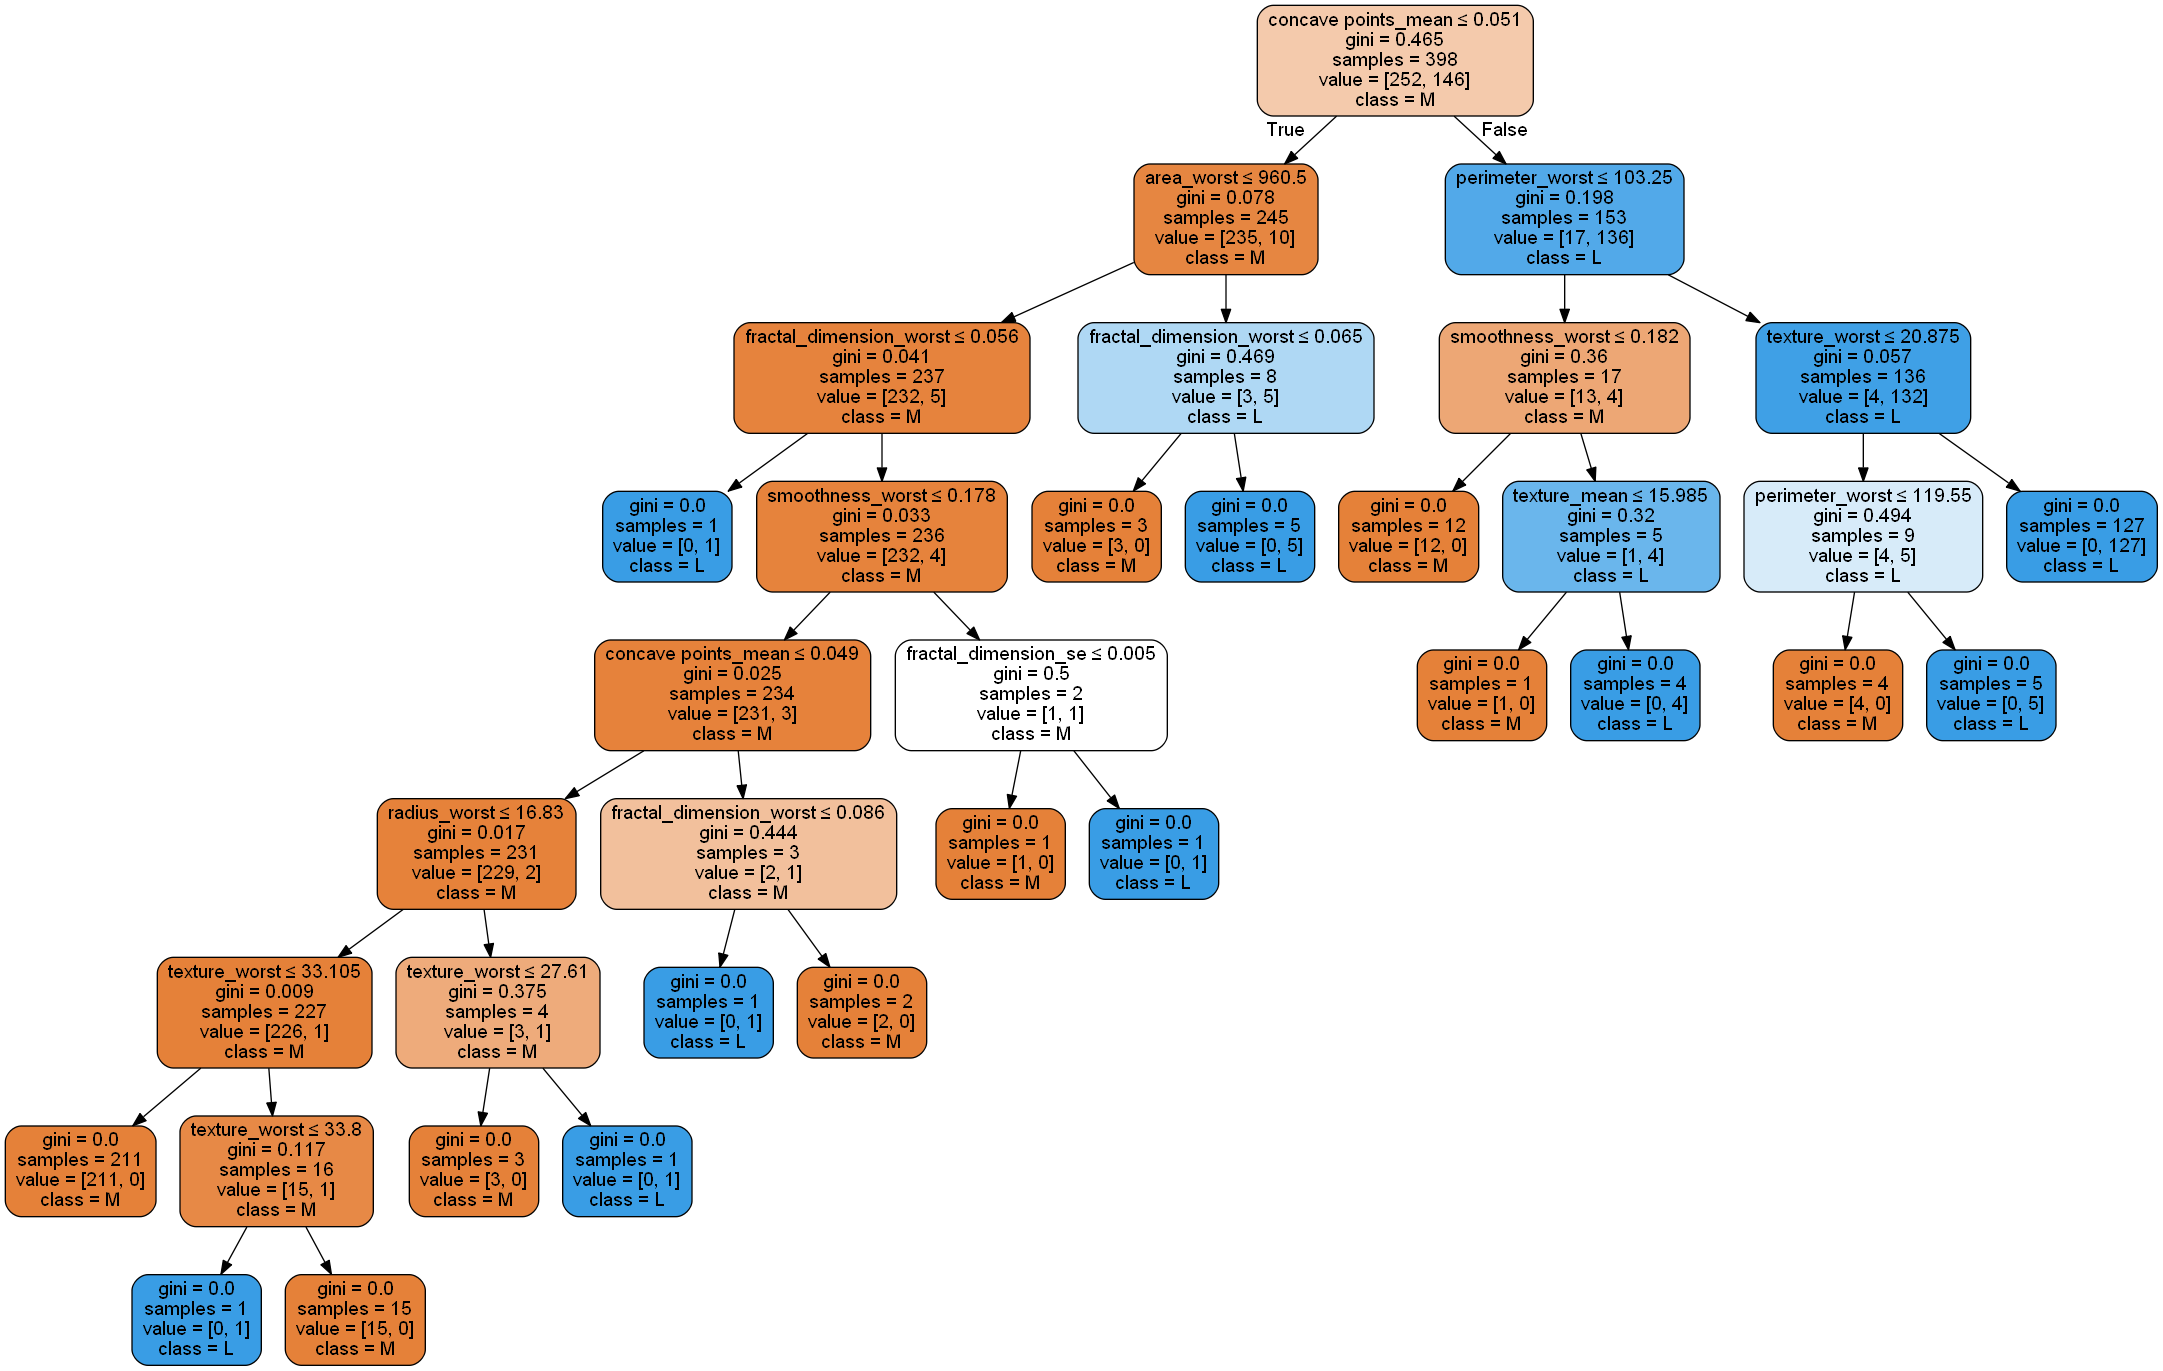

In [150]:
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['M','L'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini.png')
Image(graph.create_png())

In [151]:
datatest=pd.DataFrame(test_X)
datatest['diagnosis']=test_y
datatest['hasil prediksi entropy']=prediction_entropy
datatest['hasil prediksi gini']=prediction_gini
print(datatest)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
531       11.670         20.02           75.21      416.2          0.10160   
166       10.800          9.71           68.77      357.6          0.09594   
485       12.450         16.41           82.85      476.7          0.09514   
66         9.465         21.01           60.11      269.4          0.10440   
220       13.650         13.16           87.88      568.9          0.09646   
356       13.050         18.59           85.09      512.0          0.10820   
414       15.130         29.81           96.71      719.5          0.08320   
525        8.571         13.10           54.53      221.3          0.10360   
77        18.050         16.15          120.20     1006.0          0.10650   
239       17.460         39.28          113.40      920.6          0.09812   
254       19.450         19.33          126.50     1169.0          0.10350   
447       14.800         17.66           95.88      674.8       

In [152]:
final=pd.DataFrame({"diagnosis":test_y,"hasil prediksi entropy":prediction_entropy,"hasil prediksi gini":prediction_gini})
print(final)

     diagnosis  hasil prediksi entropy  hasil prediksi gini
531          0                       0                    0
166          0                       0                    0
485          0                       0                    0
66           0                       0                    0
220          0                       0                    0
356          0                       0                    0
414          1                       1                    1
525          0                       0                    0
77           1                       1                    1
239          1                       1                    1
254          1                       1                    1
447          0                       0                    0
301          0                       0                    0
133          0                       0                    0
187          0                       0                    0
78           1                       1  